In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
oo = pd.read_csv('C:/Users/HARIKRISHNAN M/Downloads/StudentsPerformance.csv')
oo.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [36]:
oo.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [37]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
oo.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Exploratory Data Analysis

# Q1

In [39]:
oo.groupby('gender').size()

gender
female    518
male      482
dtype: int64

In [40]:
#In the test, 518 females and 482 males participated.

# Q2

In [41]:
oo.groupby('parental level of education').size()

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

In [42]:
oo.groupby('parental level of education').size().sum()

1000

In [43]:
#From the data, it is clear that out of 1000 people, almost 1/5th of parents have either associate's degree or have gone to some college

In [44]:
oo.groupby('parental level of education').size().mean()

166.66666666666666

In [45]:
oo.groupby('parental level of education').size().median()

187.5

In [46]:
#From the data, the mean is lesser than median so the data is negatively skewed and more extreme scores are in the bottom 50% of the population.

<AxesSubplot:xlabel='parental level of education'>

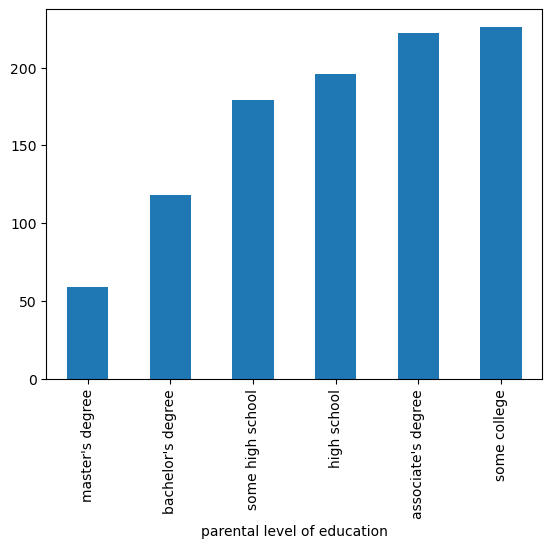

In [47]:
oo.groupby('parental level of education').size().sort_values().plot.bar() 

# Q3

In [50]:
oo.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [51]:
average = (oo['math score'] + oo['reading score'] + oo['writing score'])/3
average #creating a list for average

0        9.000000
1       18.333333
2       26.000000
3       27.000000
4       31.333333
          ...    
995     89.000000
996     94.000000
997     98.666667
998     97.666667
999    100.000000
Length: 1000, dtype: float64

In [52]:
oo.insert(8,'avg',average,True)
oo.head() #inserting the average coloumn to table

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


In [53]:
oo.groupby(['avg','gender']).agg({'avg':['count','max']}).tail() #calculating the count of people who have scored most in the avg by grouping avg and gender and then aggregrating on the count based on avg

avg            
                  count         max
avg        gender                  
98.666667  male       1   98.666667
99.000000  female     2   99.000000
99.666667  female     1   99.666667
100.000000 female     2  100.000000
           male       1  100.000000

In [54]:
#Based on gender, out of 3 people who have scored 100.0, 2 are females and 1 is male. So, clearly female outperformed male in this case

In [55]:
oo.groupby(['avg','test preparation course']).agg({'avg':['count',]}).tail() #calculating the count of people who have scored most in the avg by grouping avg and test prep course and then aggregrating on the count based on avg

avg
                                   count
avg        test preparation course      
99.000000  completed                   1
           none                        1
99.666667  completed                   1
100.000000 completed                   1
           none                        2

In [56]:
#Based on test preparation course, out of 3 people who have scored 100.0, 2 have taken no course, whereas only  1 has completed the preparation course.

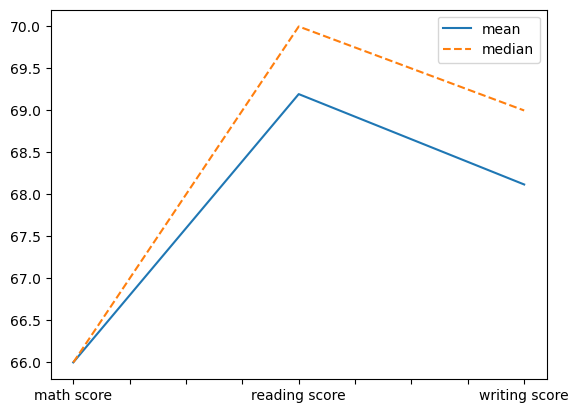

In [57]:
oo[['math score','reading score','writing score']].mean().plot(label = "mean", linestyle="-")
oo[['math score','reading score','writing score']].median().plot(label = "median", linestyle="--")
plt.legend()
plt.show()

# Q4

In [83]:
oo[['math score','reading score','writing score']].min()

math score        0
reading score    17
writing score    10
dtype: int64

In [84]:
oo[['math score','reading score','writing score']].max()

math score       100
reading score    100
writing score    100
dtype: int64

In [ ]:
#as we can see the lowest scored in math is 0, reading is 17 and writing is 10

In [99]:
oo.groupby('gender').agg({'math score':['min','max','count']})

math score           
              min  max count
gender                      
female          0  100   518
male           27  100   482

In [ ]:
#based on gender, the lowest scored by females is 0, wheres it is 27 for male.

In [156]:
oo.groupby(['gender','math score']).size().unstack('gender',fill_value = 0).head(15)

gender,female,male
math score,,
0,1,0
8,1,0
11,1,0
13,1,0
18,1,0
19,1,0
22,2,0
23,1,0
24,2,0


In [157]:
oo.groupby(['gender','math score']).size().unstack('gender',fill_value = 0).tail(5)

gender,female,male
math score,,
96,2,1
97,2,4
98,1,2
99,2,1
100,3,4


In [ ]:
#based on gender, the highest scored is 100 for both (3 females and 4 males scored 100). 1 female scored the lowest (0 score) whereas 1 male scored 27 (lowest in maths)

In [133]:
oo.groupby('gender').agg({'reading score':['min','max']})

reading score     
                 min  max
gender                   
female            17  100
male              23  100

In [ ]:
#based on gender, in reading scores, the lowest is 17 for female while 23 for male. Now, let us see how many scored the lowest and highest?

In [137]:
oo.groupby(['gender','reading score']).size().unstack('gender',fill_value = 0)

gender,female,male
reading score,,
17,1,0
23,0,1
24,1,1
26,0,1
28,0,1
...,...,...
95,8,1
96,1,3
97,4,1


In [ ]:
#based on gender, the highest scored is 100 for both (14 females and 3 males scored 100). 1 female scored the lowest (17 score) as compared to 1 male (23 score))

In [140]:
oo.groupby('gender').agg({'writing score':['min','max']})

writing score     
                 min  max
gender                   
female            10  100
male              15  100

In [ ]:
#based on gender, in writing scores, the lowest is 10 for female while 15 for male. Now, let us see how many scored the lowest and highest?

In [141]:
oo.groupby(['gender','writing score']).size().unstack('gender',fill_value = 0)

gender,female,male
writing score,,
10,1,0
15,0,1
19,0,1
22,0,1
23,1,0
...,...,...
96,4,0
97,2,0
98,2,0


In [ ]:
#based on gender, the highest scored is 100 for both (13 females and 1 males scored 100). 1 female scored the lowest (10 score) as compared to 1 male (15 score))

In [142]:
oo.groupby('test preparation course').agg({'math score':['min','max']})
#Those who took the preparation course got 23 lowest score whereas those who didn't got 0 as lowest
#Both the groups had 100 as highest score

math score     
                               min  max
test preparation course                
completed                       23  100
none                             0  100

In [158]:
oo.groupby(['test preparation course','math score']).size().unstack('test preparation course',fill_value = 0).head(20)
#No. of students who got the lowest and highest are as follows:
#1 student who completed the course got 23 (lowest score) whereas 1 student who didn't opt for course, got 0 as score(lowest)

test preparation course,completed,none
math score,,
0,0,1
8,0,1
11,0,1
13,0,1
18,0,1
19,0,1
22,0,2
23,1,0
24,0,2


In [159]:
oo.groupby(['test preparation course','math score']).size().unstack('test preparation course',fill_value = 0).tail(5)
#4 students who completed the course got 100 whereas 3 who didn't take the course also got 100

test preparation course,completed,none
math score,,
96,3,0
97,3,3
98,2,1
99,2,1
100,4,3


In [145]:
oo.groupby('test preparation course').agg({'reading score':['min','max']})
#Those who took the preparation course got 37 lowest score whereas those who didn't got 17 as lowest
#Both the groups had 100 as highest score

reading score     
                                  min  max
test preparation course                   
completed                          37  100
none                               17  100

In [160]:
oo.groupby(['test preparation course','reading score']).size().unstack('test preparation course',fill_value = 0).head(20)
#No. of students who got the lowest and highest are as follows:
#1 student who completed the course got 37 (lowest score) whereas 1 student who didn't opt for course, got 17 as score(lowest)

test preparation course,completed,none
reading score,,
17,0,1
23,0,1
24,0,2
26,0,1
28,0,1
29,0,2
31,0,2
32,0,2
34,0,6


In [161]:
oo.groupby(['test preparation course','reading score']).size().unstack('test preparation course',fill_value = 0).tail(5)
#11 students who completed the course got 100 whereas 6 who didn't take the course also got 100

test preparation course,completed,none
reading score,,
95,4,5
96,3,1
97,3,2
99,3,0
100,11,6


In [147]:
oo.groupby('test preparation course').agg({'writing score':['min','max']})
#Those who took the preparation course got 36 lowest score whereas those who didn't got 10 as lowest
#Both the groups had 100 as highest score

writing score     
                                  min  max
test preparation course                   
completed                          36  100
none                               10  100

In [162]:
oo.groupby(['test preparation course','writing score']).size().unstack('test preparation course',fill_value = 0).head(20)
#No. of students who got the lowest and highest are as follows:
#1 student who completed the course got 36 (lowest score) whereas 1 student who didn't opt for course, got 10 as score(lowest)

test preparation course,completed,none
writing score,,
10,0,1
15,0,1
19,0,1
22,0,1
23,0,1
27,0,3
28,0,1
30,0,1
32,0,2


In [153]:
oo.groupby(['test preparation course','writing score']).size().unstack('test preparation course',fill_value = 0).tail(5)
#9 students who completed the course got 100 whereas 5 who didn't take the course also got 100

test preparation course,completed,none
writing score,,
96,1,3
97,1,1
98,2,0
99,3,1
100,9,5


# Q5

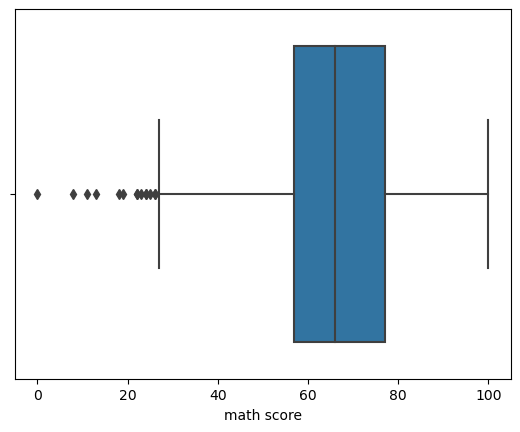

In [64]:
sns.boxplot(x='math score', data = oo);

In [65]:
q = oo['math score'].quantile(0.75) #calculating 75th quantile value
oo[oo['math score'] >= q].count() #calculating the count of people who have scores above 75th quantile

gender                         255
race/ethnicity                 255
parental level of education    255
lunch                          255
test preparation course        255
math score                     255
reading score                  255
writing score                  255
avg                            255
dtype: int64

In [66]:
# As 75% of data points lies below 77 so the top 25% lies above it. Hence, the management can award bonus points to people